In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Local Code
from DLM import filter_sample
from Utilities import load_data, print_tracker
from Paper1 import set_up_local_discount_filter
from Plotting import filter_plot, error_plot, sigma_plot, add_times_to_plot
from Times import get_times_from_sigma

In [26]:
# Load data
W2 = load_data('w2_b0')
Vel = load_data('xvelocity')

In [8]:
# Get memory counts
init, final = 1, len(Vel)
ModelVel = set_up_local_discount_filter(Vel[init], omega=0.2582, df=0.8, alpha=2, beta=0.0001**2, J=2)

num_slips = []
mem_range = np.linspace(1, 750, num=200)
for i in range(len(mem_range)):
     print_tracker(i, len(mem_range))
     results = filter_sample(ModelVel, Vel, init, final, forgetful=True, memory=mem_range[i])
     slip_start, __ = get_times_from_sigma(np.log(results.var_point_estimate()), init, window_start=[-25, 10], window_end=[-10, 50], burn_in=100)
     num_slips.append(len(slip_start))
print('Complete!')

0 percent
10 percent
20 percent
30 percent
40 percent
50 percent
60 percent
70 percent
80 percent
90 percent
Complete!


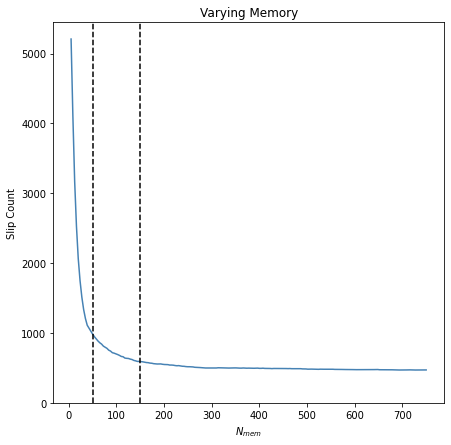

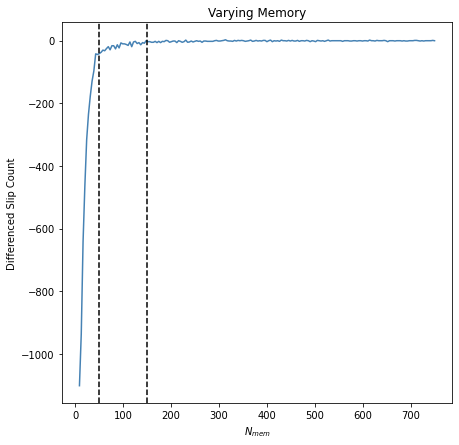

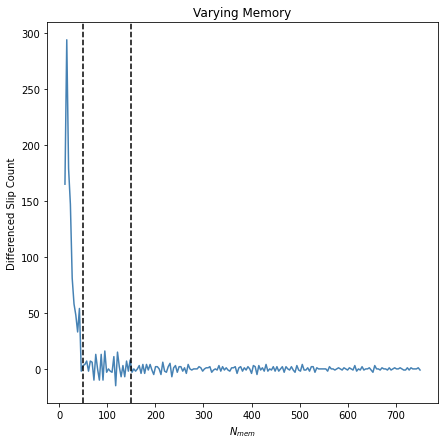

In [20]:
# Plot results
c = 1
breaks = [50, 150]
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(mem_range[c:], num_slips[c:], c='steelblue')
add_times_to_plot(ax, 0, mem_range[-1], breaks, ls='--', c='black')
ax.set_ylim(bottom=0)
ax.set_xlabel('$N_{mem}$')
ax.set_ylabel('Slip Count')
ax.set_title('Varying Memory')
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(mem_range[(c+1):], np.diff(num_slips[c:]), c='steelblue')
add_times_to_plot(ax, 0, mem_range[-1], breaks, ls='--', c='black')
ax.set_xlabel('$N_{mem}$')
ax.set_ylabel('Differenced Slip Count')
ax.set_title('Varying Memory')
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(mem_range[(c+2):], np.diff(np.diff(num_slips[c:])), c='steelblue')
add_times_to_plot(ax, 0, mem_range[-1], breaks, ls='--', c='black')
ax.set_xlabel('$N_{mem}$')
ax.set_ylabel('Differenced Slip Count')
ax.set_title('Varying Memory')
plt.show()

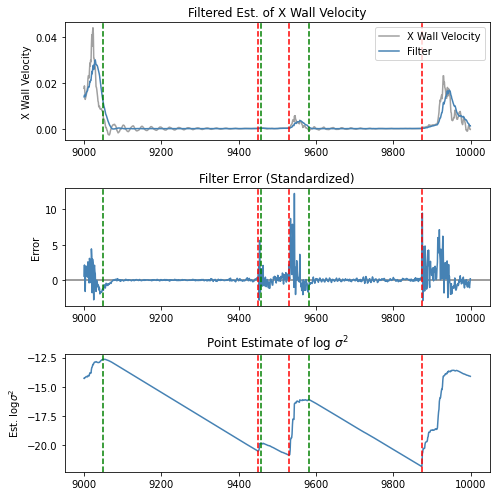

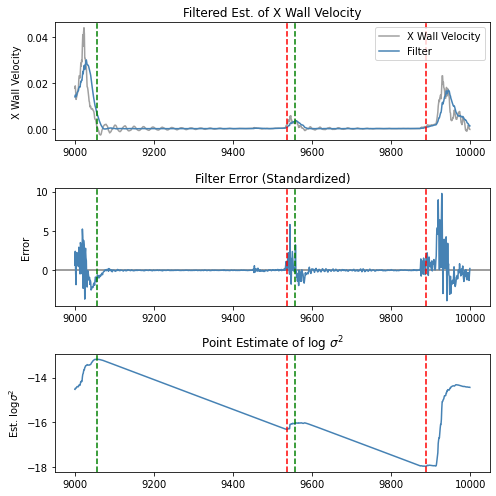

In [25]:
# Test memories of 50 and 150
# Plot Model results on sample
def quick_plot(axs, results, Data, data_label, init, final, burn_in=0):

     init = init + burn_in
     filter_plot(axs[0], results.point_estimate()[burn_in:], Data, init, final, data_label)
     error_plot(axs[1], results.standardized_error()[burn_in:], init, final, data_label)
     sigma_plot(axs[2], results.var_point_estimate()[burn_in:], init, final, log_scale=True)

for memory in [50, 150]:
     init, final = 8900, 10000
     ModelVel = set_up_local_discount_filter(Vel[init], omega=0.2582, df=0.8, alpha=2, beta=0.0001**2, J=2)
     results = filter_sample(ModelVel, Vel, init, final, forgetful=True, memory=memory)
     slip_start, slip_end = get_times_from_sigma(np.log(results.var_point_estimate()), init, window_start=[-25, 10], window_end=[-10, 50], burn_in=100)

     fig, axs = plt.subplots(3, 1, figsize=(7, 7))
     quick_plot(axs, results, Vel, 'X Wall Velocity', init, final, burn_in=100)
     for ax in axs:
          add_times_to_plot(ax, init, final, slip_start, c='red', ls='--')
          add_times_to_plot(ax, init, final, slip_end, c='green', ls='--')
     fig.tight_layout()
     plt.show()

In [ ]:
# ROC for memory 50
